# Project Proposal

In [15]:
# Run to load packages
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

# Introduction:

Tennis is a popular sport among men and women all over the world. Therefore, the analysis of factors affecting performance and success is of great interest. Since tennis players' earnings can vary widely and "Prize Money” could reflect a player's earnings in tennis tournaments, understanding the determinants of prize money can provide insights into the financial success of professional tennis players. One main factor is ranking points. In professional tennis, players compete in various tournaments, accumulate ranking points, and move up or down in the rankings based on their performance. This system is used to determine tournament entries and player recognition. In our model, our research question is "How can we use ranking points to predict the prize money a tennis player receives?" To answer the question, we will be using the data `player_stats(1).csv` from Ultimate Tennis Statistics. This data set contains the statistics of the top 500 tennis players in the world.



****Working on more*****

Cited Source: https://olympics.com/en/news/tennis-rankings-atp-wta-men-women-doubles-singles-system-grand-slam-olympics

# Data Description:

We use data from Ultimate Tennis Statistics, which is based on the open-source tennis data repository by Jeff Sackmann with some corrections and additions for incorrect or missing data. This database provides users with a variety of tennis statistics for men's tennis during the Open period, such as historical results, in-match statistics, records or all-time greats comparisons. The extensive nature of the dataset makes it a valuable resource for conducting in-depth analyses and deriving insights into various facets of men's tennis during the specified Open period.

The original dataset contains 500 rows and 38 columns with 500 tennis players and 37 factors of interest. We have wrangled and cleaned the dataset so that we can focus only on the variables we want to explore (age, backhand use, best rank, current rank, dominant hand, and prize money). We have also removed all the "NA" values. The wrangled dataset contains 407 rows and 9 columns. 

Our dependent variable is a player's earnings in tennis tournaments which is represented by "Prize Money" in our model (Unit: US dollar). Since prize money is a visual reflection of tennis players' income in the game, we set prize money as the independent variable. We predict the prize money income of professional tennis players in the subsequent data analysis to understand their economic success.

Our main independent variables are best ranking points and current ranking points. Best ranking points in tennis represents a player's historical success, indicating the highest rank they've achieved, while current ranking points reveals their current standing. Analyzing both factors is crucial as historical success can impact a player's reputation, endorsements, and invitations to prestigious tournaments, whereas current performance influences tournament entries and possible prize. Best ranking points also provides insights into a player's career trajectory, showing if they've faced challenges or are on an upward trajectory. Moreover, higher current ranking points grants players entry to more tournaments, impacting earning prize. 

Other important control variables include age, dominant hand, and the use of backhand. We chose these control variables because they all may lead to changes in the dependent variable. Age is also important since younger players may have more energy and stamina, potentially providing them with a competitive advantage. On the other hand, older players may have the experience and strategic depth, but their physical condition may decline. Dominant hand and the choice of backhand style can impact a player's style and game strategy, which might be reflected in their prize earnings. We also transformed qualitative variables to its respective dummy variable. All of these variables provide different dimensions of a player's career and can help create a more accurate model.

We have conducted a summary statistics table. For the "Variable" column, it lists the names or labels of the variables or features in our dataset. 
For the "Mean" column, it displays the average value of each variable. The mean is a measure of central tendency, representing the central or typical value in our dataset.
For the "Max" column, it shows the maximum value observed for each variable. This value represents the highest point or measurement in the dataset for a particular variable. It helps identify the upper limit or extreme values within the dataset.

age - Player's age
backhand_dummy - Player's backhand style	(where 1 means "One-handed" and 0 means "Two-handed")
best_rank - Player's highest rank
current_rank - Player's current standing
dominant_dummy - Player's dominant hand (1 means "Right-handed" and 0 means "Left-handed)
prize_money - Player's prize money

Cited Source: https://www.ultimatetennisstatistics.com/about

In [11]:
# run to load data set
player_data <- read_csv("https://raw.githubusercontent.com/dcai01/dsci100_project/main/project_proposal/data/player_stats%20(1).csv")
num_rows <- nrow(player_data)
num_rows
num_cols <- ncol(player_data)
num_cols

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 500

[1] 38

In [13]:
player_data
#The original dataset contains 500 rows and 38 columns with 500 tennis players and 37 factors of interest.

...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,25 (29-07-1994),Uzbekistan,Right-handed,Wikipedia,417 (81),253 (17-07-2017),Sanjar Fayziev,Two-handed,"$122,734",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [20]:
set.seed(1000)
# Run to view tidied/wrangled data
player_data$"Prize Money" <- gsub("[^0-9.-]", "", player_data$"Prize Money")

player_data_renamed <- player_data |>
    separate(Age, into = c("age", "birthday"), sep ="\\(") |>
    separate("Best Rank", into = c("best_rank", "date"), sep ="\\(") |>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    separate("Prize Money", into = c("prize_money", "dash"), sep = "-")|>
    rename(plays = Plays, backhand = Backhand, name = Name)|>
    select(name, age, plays, current_rank, best_rank, backhand, prize_money) |>
    drop_na()

player_data_renamed$dominant_dummy <- ifelse(player_data_renamed$plays == "Right-handed", 1, 0) #1 means "Right-handed" and 0 means "Left-handed	
player_data_renamed$backhand_dummy <- ifelse(player_data_renamed$backhand == "One-handed", 1, 0) #1 means "One-handed	" and 0 means "Two-handed"

player_data_renamed <- player_data_renamed |>
                       mutate(age = as.numeric(age),
                              current_rank = as.numeric(current_rank),
                              best_rank = as.numeric(best_rank),
                              prize_money = as.numeric(prize_money))

player_data_renamed

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 399 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”


name,age,plays,current_rank,best_rank,backhand,prize_money,dominant_dummy,backhand_dummy
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Jack Draper,18,Left-handed,326,316,Two-handed,59040,0,0
Lukas Lacko,32,Right-handed,178,44,Two-handed,3261567,1,0
Duck Hee Lee,21,Right-handed,236,130,Two-handed,374093,1,0
Bernard Tomic,27,Right-handed,183,17,Two-handed,6091971,1,0
Hubert Hurkacz,22,Right-handed,31,31,Two-handed,1517157,1,0
Sekou Bangoura,28,Right-handed,307,213,Two-handed,278709,1,0
Tung Lin Wu,21,Right-handed,232,229,Two-handed,59123,1,0
Sanjar Fayziev,25,Right-handed,417,253,Two-handed,122734,1,0
Emil Ruusuvuori,20,Right-handed,104,104,Two-handed,74927,1,0


In [21]:
# Run to split data into training and testing set
player_split <- initial_split(player_data_renamed, prop = 0.75, strata = prize_money)
player_train <- training(player_split)
player_test <- testing(player_split)

In [22]:
# Run to calculate mean, max and min of each variable
player_summarize_mean <- player_train |>
                        select(age, current_rank, best_rank, prize_money, dominant_dummy, backhand_dummy) |>
                        map_dfr(mean, na.rm = TRUE) |>
                        round(1) |>
                         pivot_longer(
                          cols = age:backhand_dummy,
                          names_to = "Variable",
                          values_to = "Mean")

                        
player_summarize_max <- player_train |>
                        select(age, current_rank, best_rank, prize_money, dominant_dummy, backhand_dummy) |>
                        map_dfr(max, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Max")

player_summarize_min <- player_train |>
                        select(age, current_rank, best_rank, prize_money, dominant_dummy, backhand_dummy) |>
                        map_dfr(min, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Max")

player_summarize_data = merge(player_summarize_mean, player_summarize_max,  by = "Variable")


player_summarize_data

Variable,Mean,Max
<chr>,<dbl>,<dbl>
age,26.4,40
backhand_dummy,0.1,1
best_rank,145.9,488
current_rank,223.6,500
dominant_dummy,0.9,1
prize_money,77568262.8,2746601610


# Methods & Results:

We will use a regression model to predict the expected prize money for a tennis athlete by using multiple variables to answer our research question.


We use scatter plots and box plots to visualize the results, which depict the relationships between independent variables with prize money as the dependent variable. 
By examining scatter plots, we can gain valuable insights, such as if the points cluster in a specific pattern, it may suggest a correlation or relationship between independent variables and prize money. Additionally, the color-coded data points help us distinguish players with different dominant hands, potentially revealing variations in prize money earnings based on this characteristic. (*******more work*******)

By examining box plots, we...
Figure 4 shows that 
Figure 5

Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


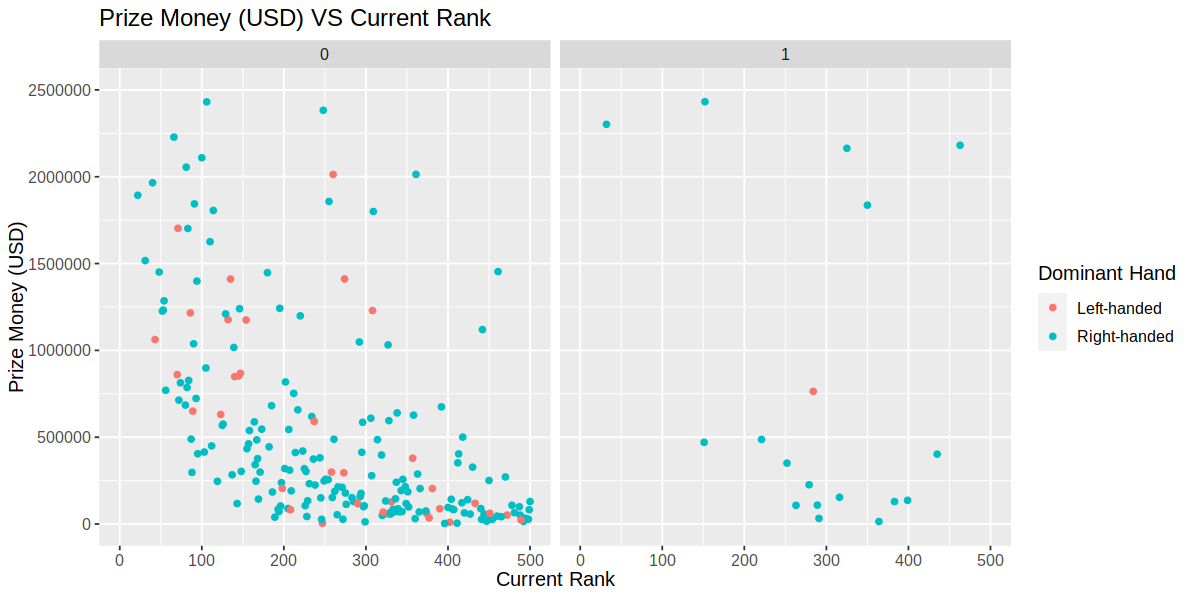

In [23]:
# Run to see plot comparing prize money and current rank
options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_current <- ggplot(player_train, aes(x = current_rank, y = prize_money, color = plays)) +
  geom_point() +
  xlab("Current Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  facet_grid(cols = vars(backhand_dummy)) +
  ggtitle("Prize Money (USD) VS Current Rank")

small_plot_current

#Figure 1

Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


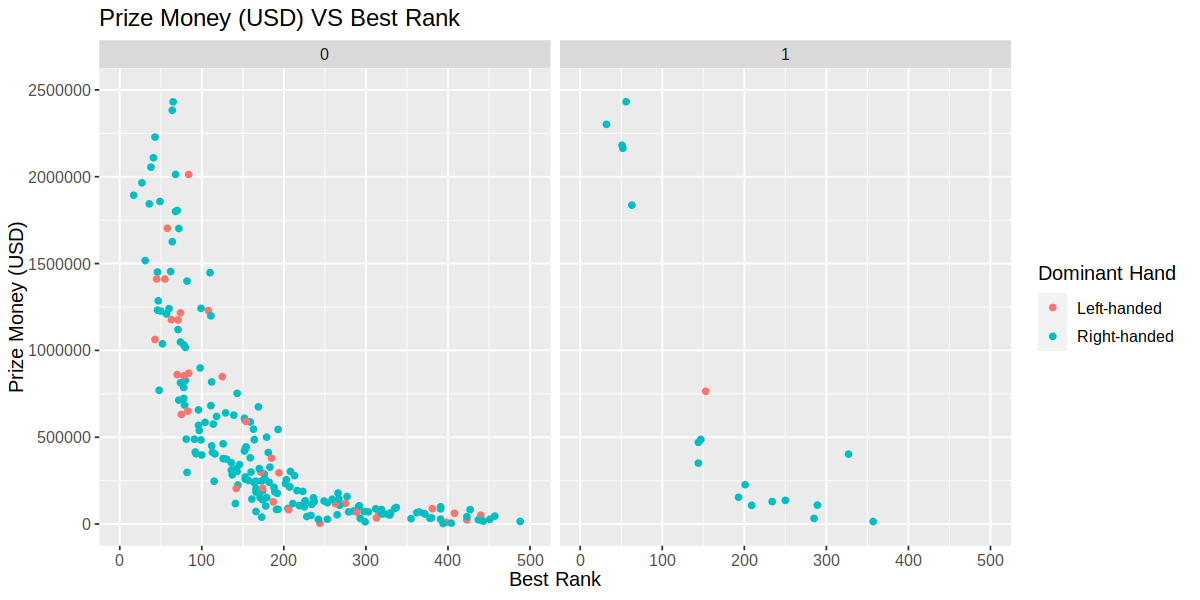

In [25]:
# Run to see plot comparing prize money and best rank 
options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_best <- ggplot(player_train, aes(x = best_rank, y = prize_money, color = plays)) +
  geom_point() +
  xlab("Best Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  facet_grid(cols = vars(backhand_dummy)) +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Best Rank")

small_plot_best
#Figure 2

Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


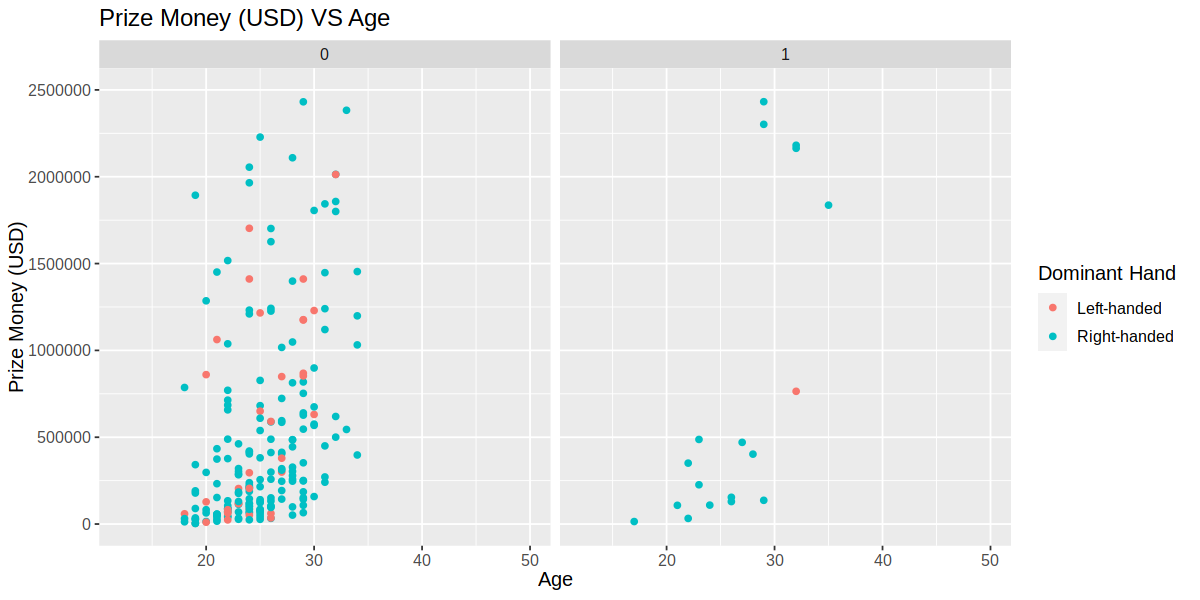

In [27]:
options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_age <- ggplot(player_train, aes(x = age, y = prize_money, color = plays)) +
  geom_point() +
  xlab("Age") +
  xlim(12, 50) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  facet_grid(cols = vars(backhand_dummy)) +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Age")


small_plot_age
#Figure 3

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 73 rows containing non-finite values (`stat_boxplot()`).”


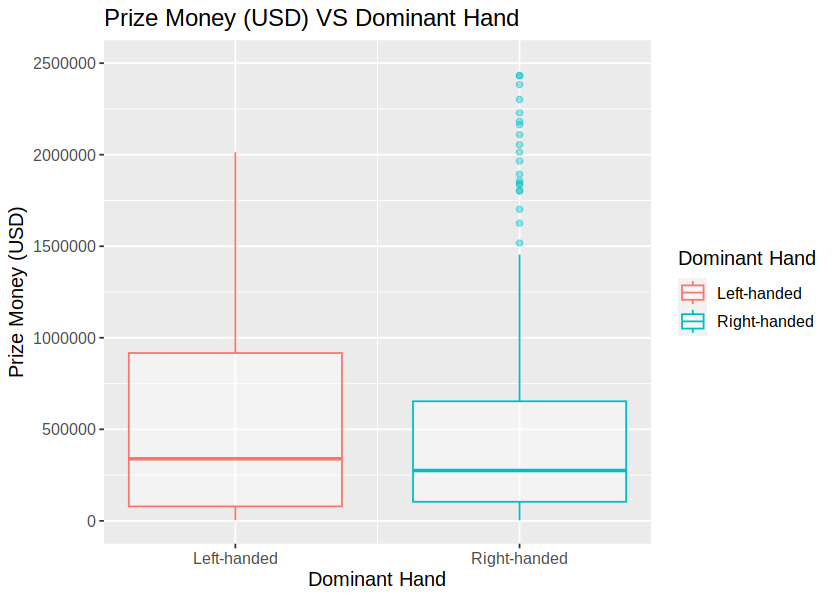

In [28]:
options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_hand <- ggplot(player_train, aes(x = dominant_dummy, y = prize_money, color = plays)) +
  geom_boxplot(alpha=0.4) +
  xlab("Dominant Hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed", "Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Dominant Hand")

small_plot_hand
#Figure 4

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 73 rows containing non-finite values (`stat_boxplot()`).”


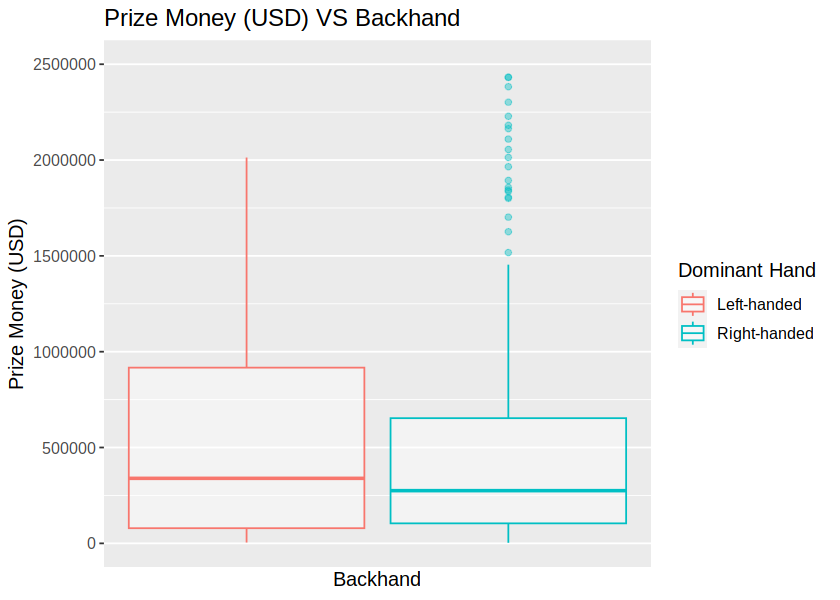

In [10]:
options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_backhand <- ggplot(player_train, aes(x = backhand_dummy, y = prize_money, color = plays)) +
  geom_boxplot(alpha=0.4) +
  xlab("Backhand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed", "One-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Backhand")

small_plot_backhand
#Figure 5

# Discussion:

We expect to find that the higher best ranking and current ranking will lead to a higher prize money. Since the ranking determines the level of tournament that a tennis player competes in, we can assume that the higher the tournament means the higher the rank and therefore, more prize money. 
We can use these findings to predict how much money a tennis player makes in prize money. If a new tennis player were to just start out their career, according to how their ranking is progressing we can see how much money this player is expected to make in the future. 
The question we may want to ask in the future is: Is there an interplay between the best rankings and the current rankings? Is there a correlation between them? If so, how do we determine which one has a greater impact on prize earning?